In [2]:
pip install opencv-python


     ---------------------------------------- 0.0/38.2 MB ? eta -:--:--
     - -------------------------------------- 1.3/38.2 MB 26.8 MB/s eta 0:00:02
     --- ------------------------------------ 3.8/38.2 MB 40.4 MB/s eta 0:00:01
     ------- -------------------------------- 6.7/38.2 MB 47.7 MB/s eta 0:00:01
     ---------- ---------------------------- 10.0/38.2 MB 53.1 MB/s eta 0:00:01
     ------------- ------------------------- 13.4/38.2 MB 72.6 MB/s eta 0:00:01
     ----------------- --------------------- 16.8/38.2 MB 72.6 MB/s eta 0:00:01
     -------------------- ------------------ 19.9/38.2 MB 72.6 MB/s eta 0:00:01
     ----------------------- --------------- 22.9/38.2 MB 72.6 MB/s eta 0:00:01
     ------------------------- ------------- 25.2/38.2 MB 72.6 MB/s eta 0:00:01
     ---------------------------- ---------- 27.9/38.2 MB 59.8 MB/s eta 0:00:01
     -------------------------------- ------ 31.6/38.2 MB 65.6 MB/s eta 0:00:01
     ----------------------------------- --- 34.


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\horta\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [3]:
!pip install opencv-python



[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: C:\Users\horta\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [4]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

Ejercicio 1:
Escribe un código que haga los siguientes cambios en la imagen dada:


Imagen original:

![Original](./Resources/Exercise/Lenna_(test_image).png "Original")


Cambio 1:

![Original](./Resources/Exercise/result_regions.png "Original")


Cambio 2:

![Original](./Resources/Exercise/result_swap.png "Original")


pista: comando np.roll

Cambio 1:

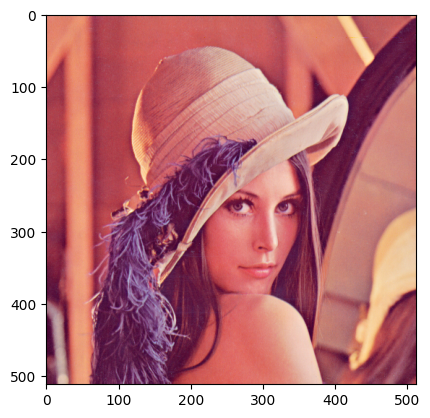

In [5]:
img = cv.imread("./Resources/Exercise/Lenna_(test_image).png")

plt.imshow(cv.cvtColor(src = img, code = cv.COLOR_BGR2RGB))

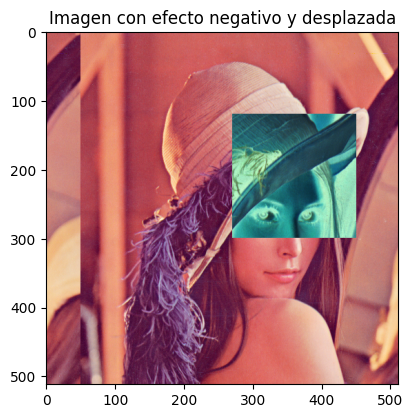

In [20]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img = cv.imread("./Resources/Exercise/Lenna_(test_image).png")

img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

img_copy = img_rgb.copy()


x_inicio, y_inicio, x_fin, y_fin = 220, 120, 400, 300

img_copy[y_inicio:y_fin, x_inicio:x_fin] = 255 - img_copy[y_inicio:y_fin, x_inicio:x_fin]

img_roll = np.roll(img_copy, shift=50, axis=1)

plt.figure(figsize=(10,5))
plt.subplot(1,2,2)
plt.imshow(img_roll)
plt.title('Imagen con efecto negativo y desplazada')

plt.show()


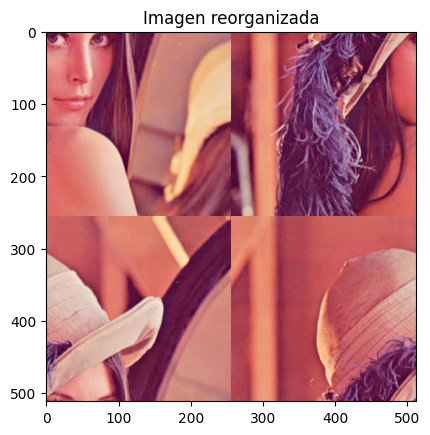

In [25]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# intento hacer como se
img = cv.imread("./Resources/Exercise/Lenna_(test_image).png")

img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

altura, anchura, _ = img_rgb.shape
mitad_altura, mitad_anchura = altura // 2, anchura // 2
parte_superior_izquierda = img_rgb[:mitad_altura, :mitad_anchura]
parte_superior_derecha = img_rgb[:mitad_altura, mitad_anchura:]
parte_inferior_izquierda = img_rgb[mitad_altura:, :mitad_anchura]
parte_inferior_derecha = img_rgb[mitad_altura:, mitad_anchura:]

parte_superior = np.concatenate((parte_inferior_derecha, parte_inferior_izquierda), axis=1)
parte_inferior = np.concatenate((parte_superior_derecha, parte_superior_izquierda), axis=1)
imagen_final = np.concatenate((parte_superior, parte_inferior), axis=0)
plt.imshow(imagen_final)
plt.title('Imagen reorganizada')
plt.show()


Ejercicio 2: Graba un video de unos segundos de tu cara moviéndose por la pantalla (que no se quede fija en el centro solamente) con tu webcam del ordenador. Haz un detector de caras con dicho vídeo. Asegúrate de que tu cara está correctamente iluminada, ya que el modelo es bastante sensible.

Extra: intenta hacerlo con vídeo en directo tomado desde tu webcam.

In [2]:
import cv2

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)

    cv2.imshow('Video', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

#funciona bien en mi ordenador al menos 

Ejercicio Extra (para los que hayan terminado lo anterior)

Había una vez, un caracol con el que se metían mucho. Tanto era así, que decidió apuntarse a un gimnasio para ponerse súper fuerte para darle una paliza a todo el mundo. Sin embargo, no era capaz de apuntarse. Vuestra tarea será conseguir que el caracol se haga un selfie mientras está entrenando y le ponga un hashtag a la foto del siguiente modo:

![Original](./Resources/Exercise/gym_snail.png "selfie")